# TD 1 : Inference Learning / Perceptron : Berlemont Kevin




## Simple Perceptron Algorithm

In this section we are going to study the behavior of a perceptron when trying to learn one classification about datas. Let us first take $M$ points, denote by $x_i$ in $\mathbb{R}^N$. Suppose that each of them are labelled by a binary label, denote by $\sigma_i$. How can the perceptron learn this classification ?

A perceptron who receives an input $x$ will compute a function of the form :
\begin{equation}
f(x) = \text{sign} (w \cdot x  - b)
\end{equation}
for vector $x \in \mathbb{R}^N$, where $w=(w_1,\dots, w_N) \in \mathbb{R}^N$ and $b \in \mathbb{R}$ are adjustable parameters, or weights.


In order to have simplified notation, up to now we will include the biaises $b$ in the vector $w$ by writting :
$$ (w_1, \dots, w_N) \rightarrow (b,w_1,\dots,w_N)$$
$$ (x_1, \dots, x_N) \rightarrow (1,x_1,\dots x_N)$$

Let us now specify the problem. Indeed, we have taken inputs which are distributed along a Gaussain in $\mathbb{R}^N$, but we will not take the classification totally randomly. Indeed, if the classification is totally random, the perceptron might not be able to learn the classification (problem of capacity). Hence we are going to take a TEACHER perceptron, with random weights, and the classification will be done according to this one :
$$ \sigma_i = \text{sign} (w_{\text{teacher}} \cdot x )$$

Why are we taking this assumption ? It is because then, the ensemble $\{ x_i, \sigma_i >0\}$ and $\{x_i, ~ \sigma_i <0 \}$ are absolutely linearly separable. 

Two sets $A$ and $B$ of points in a $n$-dimensional space are called absolutely linearly separable if $n+1$ real number exists $w_1, \dots, w_{n+1}$ exist such that $(x_1,\dots, x_n) \in A$ satisfies $\sum_i w_i x_i > w_{n+1}$ and for $B$ we have $\sum_i w_i x_i < w_{n+1}$


A perceptron allow us to fin a separation between sets wich are linearly separable. This is useful because if we take the following algorithm (simple perceptron algorithm) :




**We have a theorem :**
>Assume that there exists some parameter vector $w^{\star}$ such that $\left \lVert w^{\star}\right\rVert=1$ and some $\gamma >0$ such that for all $t=1, \dots , n$
>$$
y_t (x_t \cdot w^{\star}) \geq \gamma 
$$
>Assume in additional that $\left\lVert x_t \right\rVert \leq R$. Then the perceptron algorithm makes at most $\frac{R^2}{\gamma^2}$ errors.

--------------------------------------------
*This theorem can be demonstrate as follows :*

Let us first denote $w^k$ the parameter vector when the algorithm makes the $k$th error. We clearly have, by initialization :
$$ w^1 = 0$$
If the $k+1$'th error is made on example $t$, we have :
\begin{align}
w^{k+1} \cdot w^{\star} & = (w^k + y_t x_t) \cdot w^{\star} \\
& = w^k \cdot w^{\star} + y_t x_t \cdot w^{\star} \\
& \geq w^k \cdot w^{\star} + \gamma
\end{align}
This last inequality comes from :
\begin{equation}
y_t x_t \cdot w^{\star} \geq \gamma
\end{equation}
Basic induction on $k$ leads to :
\begin{equation}
w^{k+1} \cdot w^{\star} \geq k \gamma
\end{equation}
Using Cauchy-Schwarz we find $\left \lVert w^{k+1}\right \rVert \times \left \lVert w^{\star} \right \rVert \geq w^{k+1} \cdot w^{\star}$ and $\left \lVert w^{\star} \right \rVert=1$ :
$$
\left \lVert w^{k+1} \right \rVert \geq k \gamma 
$$
Now we need to find an upper bound on $\left \lVert w^{k+1} \right \rVert$. 
\begin{align}
\left \lVert w^{k+1} \right \rVert^2 &= \left \lVert w^k + y_t x_t \right \rVert^2 \\
& \leq \left \lVert w^k \right \rVert^2 + R^2
\end{align}
The last inequality comes from the fact that we had an error at example $t$. Using again an induction reasoning :
\begin{equation}
\left \lVert w^{k+1}\right \rVert^2 \leq k R^2
\end{equation}
Combining the two bounds we find :
\begin{equation} k \leq \frac{R^2}{\gamma^2}\end{equation}


--------------------------------------------------
We just show that we should be able to solve our problem numerically, and that's what the following simulations will do, trying to understand the limits of this approach and if indeed convergence is obtained, and the time to get it.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
from pylab import rand,plot,show,norm
import numpy as np
import gzip


def generateData(N,M):
 """ 
  generates a N-D  dataset with M samples. 
  M = nombres exemples
  N = dimensions
 """
 x = np.random.randn(M, N)
 x = np.concatenate((np.ones((M,1)),x), axis=1)
 
 
 return x/np.linalg.norm(x)


def generateTeacher(M):
 """ 
  generates the weights of the teacher. 
  
 """
 w_teacher  = np.random.uniform(low=-0.5, high=0.5, size=N+1)# +1 à expliquer car insertion du biais
 return w_teacher/np.linalg.norm(w_teacher)

def generateLabel(x,w_teacher):
 """ 
  generates the N-D linearly separable dataset. 
  The classification is done using the weight of the teacher
  return a couple : 
      - First argument is the sample
      - Second his the binary classification associated
 """
 label=np.zeros(M)
 for i in range(M):
        label[i] = np.sign(np.sum(x[i]*w_teacher))
 x= zip(x,label)
   
 return x

class Perceptron:
 def __init__(self,N=50,M=100):
  """ perceptron initialization """

  self.N=N # Dimension
  w = np.random.uniform(low=-1, high=1, size=N+1) # weights
  self.w = w
  self.learningRate = 0.1
  self.error = list() # list of error through the training
  self.M = M # number example
  self.weight_list = list() # evolution of the weights through the training
  self.weight_list.append(self.w)
    
 def response(self,x):
  """ perceptron output """
  y = np.sign(np.sum(self.w * x)) # dot product between w and x
  return y

 

 def updateWeights(self,x,iterError):
  """
   updates the weights status, w at time t+1 is
       w(t+1) = w(t) + learningRate*(d-r)*x
   where d is desired output and r the perceptron response
   iterError is (d-r)
  """
  for i in range (self.N):
        self.w[i] += self.learningRate*iterError*x[i]
  

 def train(self,data):
  """ 
   trains all the vector in data.
   Data must be a couple. The second element should be the label.
   Return the number of iterations needed to perform the training
  """
  learned = False # Do we continue or not the training ? 
  iteration = 0
  while not learned:
   globalError = 0.0
   for (x,label) in data: # for each sample
    r = self.response(x)    
    if label != r: # if we have a wrong response
     iterError = label- r # desired response - actual response
     self.updateWeights(x,iterError)
     globalError += abs(iterError)
   self.error.append(globalError/self.M)
   
   iteration += 1
   #Normalization (don't forget to explain in theory why we do this)
   norm_temp = np.linalg.norm(self.w)
   self.w = self.w/norm_temp
   self.weight_list.append(self.w)
   #print (iteration)
   if globalError == 0.0 or iteration >= 100: # stop criteria
    #print ('iterations',iteration)
    learned = True # stop learning
    
  return iteration
    


In [3]:
#N=50
#M=100
#w_teacher = generateTeacher(N)
#x_trainset = generateData(N,M)

#x_data = generateLabel(x_trainset, w_teacher)

#-----------------------
# DATA LIST !!!!!!! Ne pas relancer, passer directement à la récup des fichiers sauf si nombre N ou M change
#---------------------------
N_list=np.array([10,50,100,500,1000,2000])
M_list=np.array([20,100,200,1000,5000,10000,20000])

iterations_matrix=np.zeros((len(N_list),len(M_list))) # abscisses : dimensions, ordonnées : nbr exemples
weight_matrix = [] # sera composé de N matrices temporaires qui auront chacune M vetcteurs poids
norme_matrix = np.zeros((len(N_list),len(M_list))) # norme error mais suelement la dernière
teacher_matrix = list() # on va metter un couple N,teacher
#error_matrix = np.zeros((N,M))

for i,N in enumerate(N_list):
    w_teacher = generateTeacher(N)
    teacher_matrix.append((N,w_teacher))
    #print N
    for j,M in enumerate(M_list):
        x_trainset=generateData(N,M)
        #print M
        x_data = generateLabel(x_trainset,w_teacher)
        perceptron = Perceptron(N,M)
        iterations = perceptron.train(x_data)
        iterations_matrix[i,j] = iterations
        #error_matrix[i,j] = perceptron.error
        norme_matrix[i,j]=np.linalg.norm(perceptron.weight_list[-1]-w_teacher)
        

In [8]:
try:
   import cPickle as pickle
except:
   import pickle

with open('donnees_perceptron_nouveaucode','wb') as fichier:
    my_pickler= pickle.Pickler(fichier)
    my_pickler.dump(teacher_matrix)
    my_pickler.dump(iterations_matrix)
    my_pickler.dump(N_list)
    my_pickler.dump(M_list)
    my_pickler.dump(norme_matrix)
    readme=['normematrix','Mlist','Nlist','iterations','teacher']
    my_pickler.dump(readme)
    


In [ ]:
with open('donnees_perceptron','rb') as fichier:
    my_pickler= pickle.Unpickler(fichier)
    readme=my_pickler.load()
    norme_matrix=my_pickler.load()
    M_list = my_pickler.load()
    N_list = my_pickler.load()
    iterations_matrix = my_pickler.load()
    teacher_matrix = my_pickler.load()

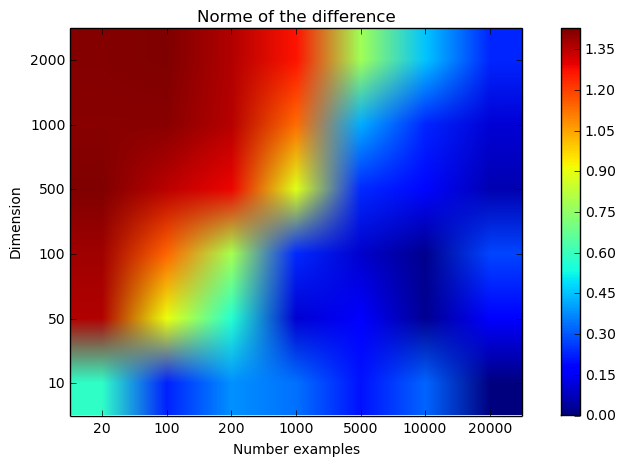

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(111)
ax.set_title('Norme of the difference')
plt.imshow(norme_matrix,origin='lower')
ax.set_aspect('equal')
ax.set_ylabel('Dimension')
ax.set_xlabel('Number examples')
ax.set_xticklabels(['',20,100,200,1000,5000,10000,20000])
ax.set_yticklabels(['',10,50,100,500,1000,2000])

plt.colorbar()
plt.show()

This figure shows us how our perceptron is able to generalize after his training. Indeed, he will generalize perfectly if and only if $w_{\text{perceptron}} = w_{\text{teacher}}$. Given two parameters ; dimension of the input space and the number of example we can observe two different behaviors. 

As the number of examples increases the difference between the two weight vectors decreases, which means that our perceptron learns more precisely the teacher's vector. And he will be able to generalize more easily.

However as the dimension of the input space increases, it's the opposite effect. To generalize high-dimensional inputs we need more examples.

*The question we can ask is : Does the loss of generalization come from the fact that our algorithm goes not over 100 iterations ?*

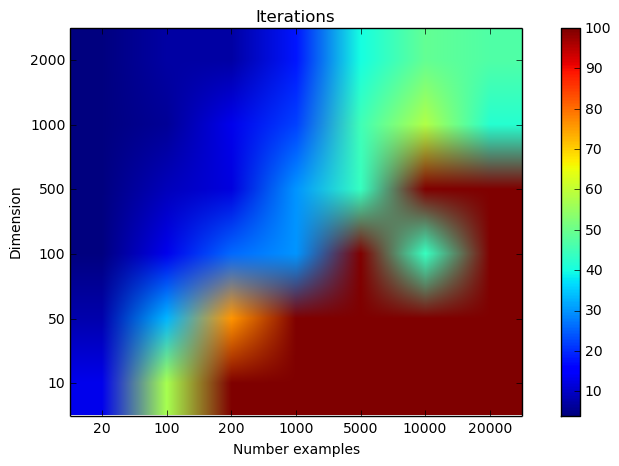

In [5]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(111)
ax.set_title('Iterations')
plt.imshow(iterations_matrix,origin='lower')
ax.set_aspect('equal')
ax.set_ylabel('Dimension')
ax.set_xlabel('Number examples')
ax.set_xticklabels(['',20,100,200,1000,5000,10000,20000])
ax.set_yticklabels(['',10,50,100,500,1000,2000])

plt.colorbar()
plt.show()

This figure allows us to answer the previous question. Indeed the variations of the number of iterationso ur algorithm makes is the inverse of the one of the diiference between the wieght vectors.

For high-dimensional space our algorithm converges in a few iterations to a good classifier. However he will be bad at generalization. In contrary for high number of example the algorithm converges slowly but the obtained perceptron will be good at generalization.

This result is in accordance to the theorem of *convergence of perceptron algorithm*, which statest hat the number of errors our algorithms is making, depends strongly on the *distance* betwwen the two classifications. If we increase the number of example, the distance is smaller, it's harder to classify but it will be easier to generalize because we need to be more precise to classify the examples.

In [6]:
N=500
w_teacher = generateTeacher(N)

M_list=[10,100,500,1000,10000]

error_list = list()

for i,M in enumerate(M_list):
    x_trainset = generateData(N,M)

    x_data = generateLabel(x_trainset, w_teacher)
    perceptron = Perceptron(N,M)
    iterations = perceptron.train(x_data)
    error_list.append(perceptron.error)
    
    
import matplotlib.pyplot as plt
%matplotlib inline


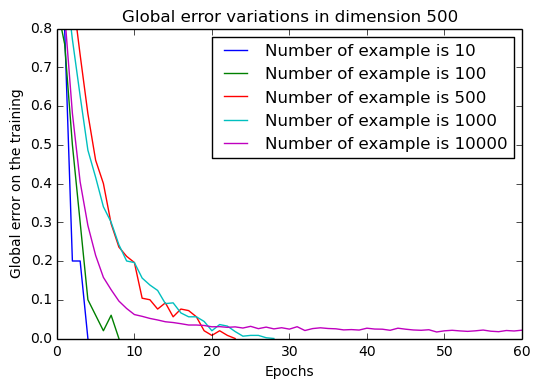

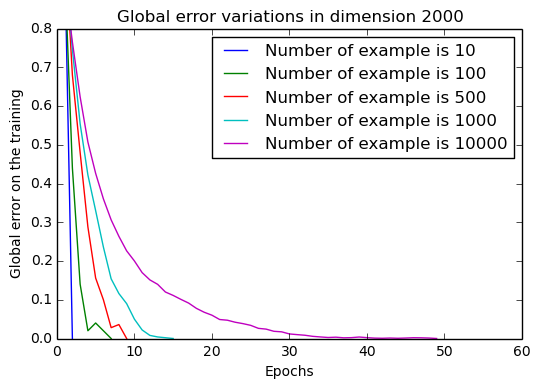

In [8]:
plt.figure(1)

for i,error in enumerate(error_list) :
    
    plt.plot(error,label='Number of example is ' +str(M_list[i]))
plt.xlabel('Epochs')
plt.ylabel('Global error on the training ')
plt.axis([0,60,0,0.8])
plt.title('Global error variations in dimension ' + str(N))
plt.legend(loc=1)
plt.show()


N=2000
w_teacher = generateTeacher(N)

M_list=[10,100,500,1000,10000]

error_list = list()

for i,M in enumerate(M_list):
    x_trainset = generateData(N,M)

    x_data = generateLabel(x_trainset, w_teacher)
    perceptron = Perceptron(N,M)
    iterations = perceptron.train(x_data)
    error_list.append(perceptron.error)
    
plt.figure(2)

for i,error in enumerate(error_list) :
    
    plt.plot(error,label='Number of example is ' +str(M_list[i]))
plt.xlabel('Epochs')
plt.ylabel('Global error on the training ')
plt.axis([0,60,0,0.8])
plt.title('Global error variations in dimension ' + str(N))
plt.legend(loc=1)
plt.show()

Those figure show the evolution of the global error on the training set during the training. We have tried for several dimensions of the input space, and several number of examples and we observe the same behavior as for the final distribution of the norm.

We could just add that even if for large sample in a small input space the error decreases faster than for less examples, it will achive total training slower anyways. We just see in another form the fact that it's hard to be extremly precise during the training with a great number of examples.



## MNIST Data

We now want to classify the digits in the MNIST database. For this purpose we will still use the perceptron algorithm. However in contrary to the previous part we do not have only binary label. 

Hence we need to take a model of $10$ perceptrons, taking an input of dimensions $784$. Each perceptron gives as output a number and the largest number between all the perceptrons will correspond to the digit our network has choose.

We just need to compare with the correct label and apply the same perceptron algorithm rule as before.


In [7]:
# import pychecker.checker
import numpy as np
import argparse
import six
import pickle
from six.moves.urllib import request
import os
import bz2

trainurl = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/mnist.bz2'
testurl = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/mnist.t.bz2'

def read_file(filename):
    """Read data file and make features
    Args:
        filename: filename to read (str with relative path)
    Returns:
        ans: A dict mapping keys, consisting of:
            {'target': #TARGET, 'features': #np.2darray}
        max_dim: max dimension of input featureset
    Features 2darray has the shape of [[dimensions array],[valus array]].
    Be careful this is not direct expression of matrix.
    """
    print "reading and making pickles..."
    ans = []
    max_dim = 1
    for line in open(filename, 'r'):
        sind = line.find(" ")
        label = int(line[0:sind])    # separated by space
        one = {}
        one['target'] = label

        features = np.zeros([2, 1])
        length = line[sind + 1:].find(" ")
        while 1:
            tempstr = line[sind + 1:sind + 1 + length]
            if tempstr.find(':') > 0:
#                print tempstr
                fdim = int(tempstr[:tempstr.find(":")])
                # get max dimension of input feature to make matrix
                max_dim = np.max([max_dim, fdim])
                fval = float(tempstr[tempstr.find(":") + 1:])
                f = np.array([[fdim], [fval]])
                features = np.append(features, f, axis=1)
                sind, length = sind + length + 1, line[sind + length + 2:].find(" ")
            if length < 0:
                break

        features = features.T[1:].T
        one['features'] = features
        ans.append(one)
    return ans, max_dim


def make_featuremat(dicts, dim):
    """Make feature matrix for input and output
    Args:
        dicts, dim: Returns of function "read_file"
    Returns:
        data: feature matrix
    """
    data = {}
    data['x'] = np.zeros([len(dicts), dim])
    data['y'] = np.zeros([len(dicts)])
    for i in range(0, len(dicts)):
        data['y'][i] = dicts[i]['target']
        temp = dicts[i]['features']

        for j in range(0, len(temp[0])):
            data['x'][i][temp[0][j] - 1] = temp[1][j]

    return data


def save_pkl(data, filename):
    savename = filename + '.pkl'
    print 'Save datasets as pkl: %s' % (savename)
    with open(savename, 'wb') as output:
        six.moves.cPickle.dump(data, output, -1)
    print('Done')


def download_dataset():
    print 'Downloading data/mnist.bz2'
    request.urlretrieve(trainurl, filename="data/mnist.bz2")
    bz2.decompress("data/mnist.bz2")
    print('Done')
    print 'Downloading data/mnist.t.bz2'
    request.urlretrieve(testurl + '.t', filename="data/mnist.t.bz2")
    bz2.decompress("data/mnist.t.bz2")
    print('Done')


if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Read MNIST dataset')
    fname = "data/mnist"

    if not os.path.exists(fname):
        download_dataset()


    ans, max_dim = read_file(fname)
    print len(ans), max_dim
    data = make_featuremat(ans, max_dim)
    save_pkl(data, fname)


    fname = "data/mnist.t"
    ans, max_dim = read_file(fname)
    print len(ans), max_dim
    data = make_featuremat(ans, max_dim)
    save_pkl(data, fname)


"""
open pickle
with open(filename, 'rb') as D_pickle:
    D = six.moves.cPickle.load(D_pickle)
"""

reading and making pickles...
60000 779


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:70: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Save datasets as pkl: data/mnist.pkl
Done
reading and making pickles...
10000 777
Save datasets as pkl: data/mnist.t.pkl
Done


"\nopen pickle\nwith open(filename, 'rb') as D_pickle:\n    D = six.moves.cPickle.load(D_pickle)\n"

In [9]:
import pickle
import six
import numpy as np
import argparse


def read_pkl(fname):
    with open(fname, 'rb') as d_pickle:
        data = six.moves.cPickle.load(d_pickle)
    return data


class Perceptron:
    """Train and test the perceptron.
    This class has one perceptron model, which has weight and bias.
    Before setting the class, input "Train data" and "Test data",
    in order to set feature matrix due to feature dimension.
    """
    def __init__(self, traindata, testdata):
        
        
        self.num_ofdim = np.max([len(traindata['x'][0]), len(testdata['x'][0])])
        self.num_ofclass = int(np.max(traindata['y']) + 1) # +1 à expliquer en theorie
        self.w = np.random.rand(self.num_ofclass, self.num_ofdim + 1)
        self.accuracy_train = list()
        self.accuracy_test = list()
                
        
    def reshape_mat(self, data):
        """Reshaping input feature matrix, because either train/test data
        does not always have all the features that the other has.
        """
        if len(data['x'][0]) < self.num_ofdim:
            x = data['x']
            x_plus = np.zeros([len(x), self.num_ofdim - len(x[0])])
            data['x'] = np.append(x, x_plus, axis=1)
        return data

    def predict(self, w, x):
        """Prediction function.
        N-class discrimination: from 0 to (n-1)
        """
        pred_val = np.dot(w, np.append(x, 1))
        pred_class = np.argmax(pred_val)
        return pred_class # expliquer théorie

    def w_update(self, x, y, pred_class, alpha=0.001):
        """Weight update function.
        alpha is learning rate.
        """
        tempw = self.w[pred_class]
        self.w[y] += alpha * np.append(x, 1)
        self.w[pred_class] -= alpha * np.append(x, 1)

    def train(self, data, iteration):
        """Train function.
        """
        num = len(data['y'])
        data = self.reshape_mat(data)

        for j in range(0, iteration):
            acc = 0
            order = np.random.permutation(num) # some statistical inference stuff (stochastic descent)
            for i in range(0, num):
                x, y = data['x'][order[i]], data['y'][order[i]]
                yhat = self.predict(self.w, x)
                if y == yhat:
                    acc += 1
                else:
                    self.w_update(x, y, yhat)
            self.accuracy_train.append(acc / float(num))
            #print 'Iteration %d: acc = %f' % (j+1, acc / float(num)*100)

    def test(self, data):
        """Test function.
        """
        num = len(data['y'])
        self.reshape_mat(data)

        acc = 0
        order = np.random.permutation(num)
        for i in range(0, num):
            x, y = data['x'][order[i]], data['y'][order[i]]
            yhat = self.predict(self.w, x)
            if y == yhat:
                acc += 1
        self.accuracy_test.append(acc / float(num))
        #print 'Test: acc = %f' % (acc / float(num) * 100)



In [10]:
fname = "mnist"


traindata = read_pkl("data/" + fname + ".pkl")
testdata = read_pkl("data/" + fname + ".t.pkl")

Perc = Perceptron(traindata, testdata)


iterations = 40
for i in range(iterations):
        Perc.test(testdata)
        Perc.train(traindata, 1)
     

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:52: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


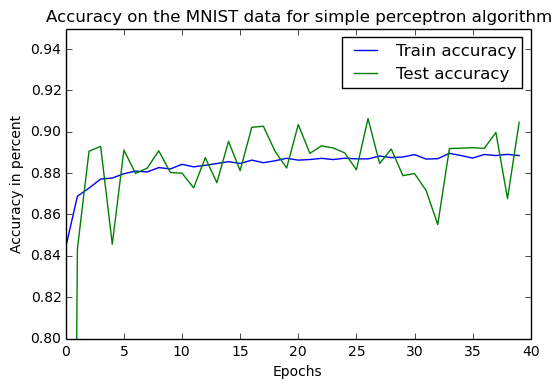

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(2)

plt.plot(Perc.accuracy_train,label='Train accuracy')
plt.plot(Perc.accuracy_test,label='Test accuracy')
plt.axis([0,40,0.8,0.95])
plt.title('Accuracy on the MNIST data for simple perceptron algorithm ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy in percent')
plt.legend()
plt.show()

On this figure we see how the accuracy increases with the number of epochs. The interesting thing is that our system is not able to reach perfect accuracy, even on training set. This is in accordance with the results of the previous part because we have $60000$ inputs in only a 784 dimensional space.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:52: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


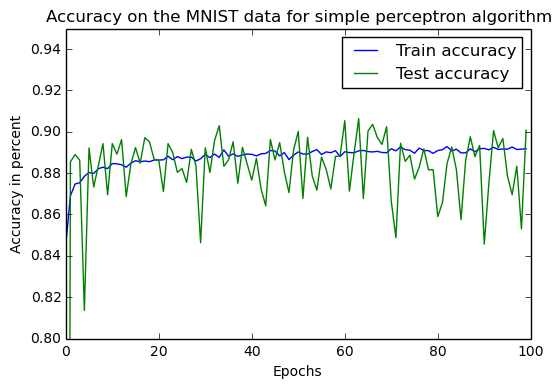

In [12]:
fname = "mnist"


traindata = read_pkl("data/" + fname + ".pkl")
testdata = read_pkl("data/" + fname + ".t.pkl")

Perc = Perceptron(traindata, testdata)


iterations = 100
for i in range(iterations):
        Perc.test(testdata)
        Perc.train(traindata, 1)
plt.figure(2)

plt.plot(Perc.accuracy_train,label='Train accuracy')
plt.plot(Perc.accuracy_test,label='Test accuracy')
plt.axis([0,100,0.8,0.95])
plt.title('Accuracy on the MNIST data for simple perceptron algorithm ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy in percent')
plt.legend()
plt.show()

If we keep the computation durong more time we see the same behavior. The training accuracy seems to have reach a plateau. However our algorithm is still modifying the weight vector. Indeed we see some oscillations of the test accuracy, around the mean value of train accuracy. This stands for the fact that globally the train accuracy is constant but the network is always changing his weights, and thus modifying the vectors for which he misclassified.

This figure allows us to understand the difficulty to learn some specif features with a good accuracy, and the difficulty of generalization. Indeed the results on the test datas are very noisy, and in reality we want good performance on the test data, the training data are just here to be able to train.

Because the behavior of the global error is really different of previously, it decreases a lot slower, we can deduce that our datas are probably not linearly separable or we should be able to classify perfectly the training data at least.

To improve the results on accuracy we should work with non-linear classifier (like SVM for example) or preprocessing the datas in order to find an input space in which the datas arem more likely to be linear eparable sets.